<h1 style="text-align: center;">Desafío - Regresión desde la econometría</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Regresión desde la econometría`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78283/activities/119111/items/610886">plataforma</a>.

## Habilidades a evaluar
- Reconocer la terminología asociada a la modelación estadística.
- Identificar la regresión lineal y sus fundamentos.
- Interpretar los parámetros estimados en la regresión.
- Interpretar inicialmente estadísticas de bondad de ajuste y coeficientes.
- Reconocer los supuestos en los que la regresión tiene sustento teórico.
- Implementar un modelo de regresión con `statsmodels`.

## Descripción
En la empresa en la cual te encuentras contratado, te solicitan trabajar con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv `Credit` abarca las siguientes variables:
- `Income`: Ingreso anual disponible en miles de dólares.
- `Limit`: Límite del crédito.
- `Rating`: Ranking del crédito.
- `Cards`: Cantidad de tarjetas de crédito.
- `Age`: Edad del usuario.
- `Education`: Años de educación del usuario.
- `Gender`: ¿Hombre o mujer?
- `Student`: ¿Es estudiante?
- `Married`: ¿Está casado?
- `Ethnicity`: Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
- `Balance`: Promedio de deuda en tarjeta de crédito de usuario.

El objetivo que persigue el trabajo con esta base de datos es conocer los determinantes de la variación en el promedio de deuda en tarjeta de crédito. Para ello se te solicita generar modelos econométricos para inspeccionar los efectos de distintos atributos a partir de requerimientos que serán detallados más adelante.

## Requerimientos

### 1. Preparar el ambiente de trabajo (1 puntos). Para ello debes:

- Importar las librerías básicas para el análisis de datos.
- Incluir los import base de `statsmodels`.
- Importar la base de datos `Credit.csv` y eliminar la columna `Unnamed: 0`.
- Siguiendo las buenas prácticas, genera variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de `Ethnicity`, genere binarias para `African American` y `Asian`.

_**Tip**_: Utilice `value_counts()` para revisar la cantidad de casos en las variables categóricas.

In [4]:
# Utiliza esta celda para importar los módulos y el set de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats 

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10,10)

df = pd.read_csv('Credit.csv').drop(columns=['Unnamed: 0'])
df.head()


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [5]:
# Utiliza esta celda para explorar las frecuencias de Ethnicity con value_counts
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [30]:
# Utiliza esta celda para crear variables binarias para las categorías de Ethnicity, omitiendo la de mayor frecuencia
df['Asian'] = np.where(df['Ethnicity'] == 'Asian',1,0)
df['AfricanAmerican'] = np.where(df['Ethnicity'] == 'African American',1,0)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Asian,AfricanAmerian,Married_No,Student_Yes,Male,AfricanAmerican
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,0,0,1,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,0,0,1,0,0
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,1,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0,1,0,0,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,0,0,1,0


In [9]:
# Utiliza esta celda para explorar las frecuencias de Married con value_counts
df['Married'].value_counts()

Yes    245
No     155
Name: Married, dtype: int64

In [11]:
# Utiliza esta celda para crear una variable binaria para la categoría de Married de menor frecuencia
df['Married_No'] = np.where(df['Married']=='No',1,0)

In [12]:
# Utiliza esta celda para explorar las frecuencias de Student con value_counts
df['Student'].value_counts()

No     360
Yes     40
Name: Student, dtype: int64

In [13]:
# Utiliza esta celda para crear una variable binaria para la categoría de Student de menor frecuencia

df['Student_Yes'] = np.where(df['Student'] == 'Yes', 1,0)

In [14]:
# Utiliza esta celda para explorar las frecuencias de Gender con value_counts
df['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [16]:
# Utiliza esta celda para crear una variable binaria para la categoría de Gender de menor frecuencia. OJO, Male tiene un espacio en blanco al principio
df['Male'] = np.where(df['Gender']==' Male',1,0)
df.head()


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Asian,AfricanAmerian,Married_No,Student_Yes,Male
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,0,0,1
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,0,0,1,0
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,1,0,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0,1,0,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,0,0,1


### 2. Generar gráficos descriptivos para las variables continuas (1 punto)

- Genere una función llamada `plot_hist` que genere un histograma de la variable e indique la media y mediana de la misma.
- Agregue una leyenda para indicar qué representa cada línea.
- ¿Cuál es el comportamiento de Balance, Income, Cards y Rating?

In [17]:
# Utiliza esta celda para definir la función plot_hist
def plot_hist(data, variable):
    media = np.mean(data[variable])
    mediana = np.median(data[variable])

    sns.displot(data[variable], kde=True, bins=8, aspect=2)
    plt.axvline(media, color='lightseagreen', label=f'Media: {round(media,2)}', lw=3, ls='dotted')
    plt.axvline(mediana, color='plum', label=f'Mediana: {round(mediana,2)}', lw=3, ls='dotted')
    plt.title(f'Histograma para {variable}')
    plt.legend()

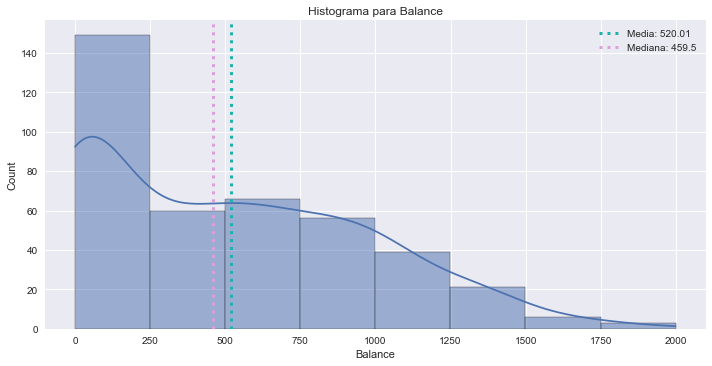

In [18]:
# Utiliza esta celda para generar gráfico de Balance
plot_hist(df,'Balance');

**Comentarios**

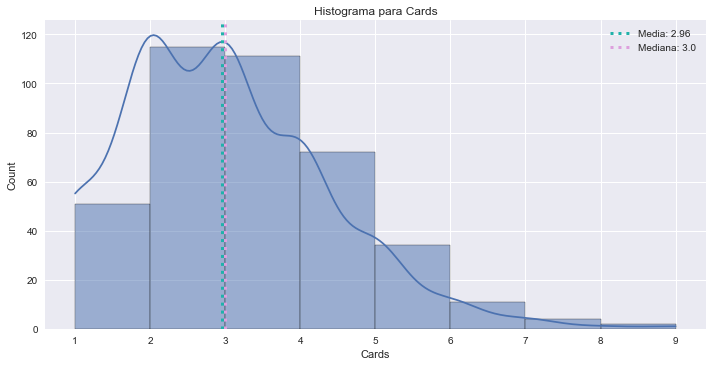

In [19]:
# Utiliza esta celda para generar gráfico de Cards
plot_hist(df,'Cards')

**Comentarios**

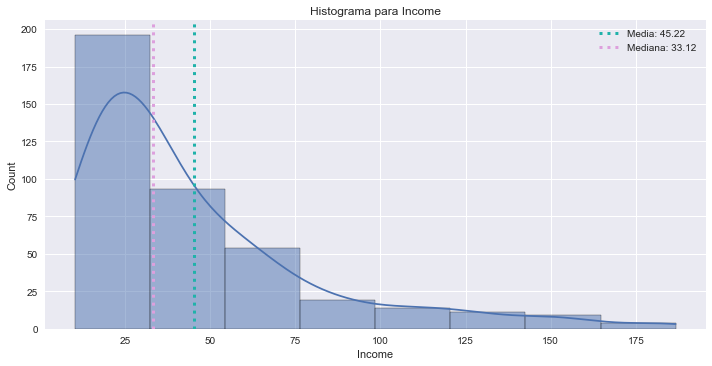

In [20]:
# Utiliza esta celda para generar gráfico de Income
plot_hist(df,'Income')

**Comentarios**

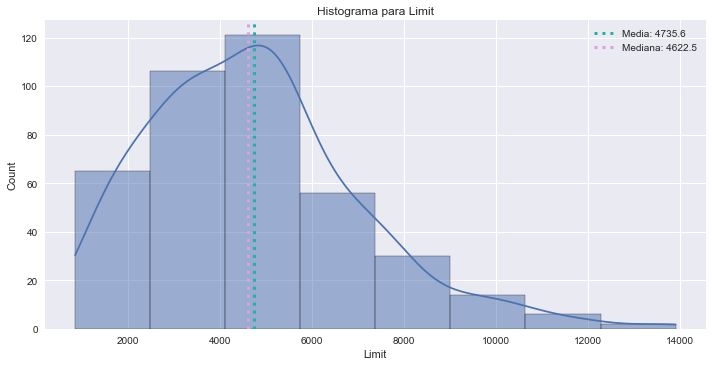

In [21]:
# Utiliza esta celda para generar gráfico de Limit
plot_hist(df,'Limit')

**Comentarios**

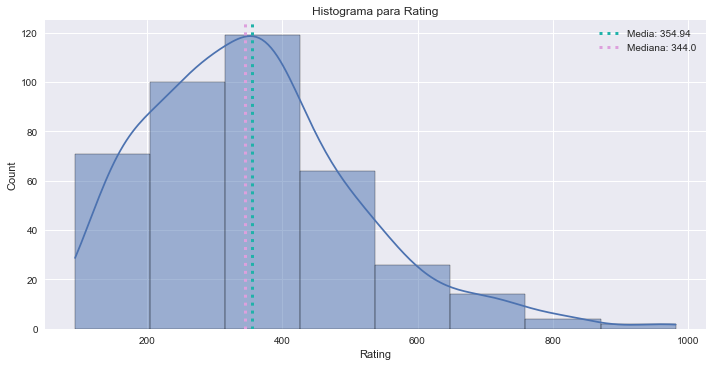

In [22]:
# Utiliza esta celda para generar gráfico de Rating
plot_hist(df,'Rating')

**Comentarios**

### 3. Regresión Lineal Simple (2 puntos). 

- Para ello se debe generar una serie de modelos simples utilizando `statsmodels`:
$$
\text{Balance}_i = \beta_0 + \gamma_{student} \cdot \text{student}_i + \epsilon_i \\
\text{Balance}_i = \beta_0 + \beta_{income} \cdot \text{income}_i + \epsilon_i \\
\text{Balance}_i = \beta_0 + \beta_{rating} \cdot \text{rating}_i + \epsilon_i
$$

In [23]:
# Utiliza esta celda para generar y entrenar los 3 modelos solicitados
modelo_student = smf.ols('Balance ~ Student_Yes', data=df).fit()
modelo_income = smf.ols('Balance ~ Income', data=df).fit()
modelo_rating = smf.ols('Balance ~ Rating', data=df).fit()

- ¿Qué variable presenta un mayor poder explicativo de la variabilidad de `Balance`?

In [24]:
# Utiliza esta celda para explorar el poder explicativo de la variabilidad de Balance en los 3 modelos
print(f'El poder explicativo de la variabilidad de Balance para el modelo Balanace ~ Student_Yes es de {round(modelo_student.rsquared, 2)}')
print(f'El poder explicativo de la variabilidad de Balance para el modelo Balance ~ Income es de {round(modelo_income.rsquared, 2)}')
print(f'El poder explicativo de la variabilidad de Balance para el modelo Balance ~ Rating es de {round(modelo_rating.rsquared, 2)}')

El poder explicativo de la variabilidad de Balance para el modelo Balanace ~ Student_Yes es de 0.07
El poder explicativo de la variabilidad de Balance para el modelo Balance ~ Income es de 0.21
El poder explicativo de la variabilidad de Balance para el modelo Balance ~ Rating es de 0.75


**Respuesta**

- ¿Qué podemos decir sobre el comportamiento de Student?

In [25]:
# Utiliza esta celda para explorar los valores de los coeficientes del modelo Balance ~ Student
modelo_student.params

Intercept      480.369444
Student_Yes    396.455556
dtype: float64

**Respuesta**

- ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

In [26]:
# Utiliza esta celda para realizar la prueba de hipótesis solicitada
prueba = stats.ttest_ind(
    df.query('Student_Yes == 1')['Balance'].dropna(),
    df.query('Student_Yes == 0')['Balance'].dropna()
)

prueba[0], 1 - prueba[1]

(5.349964123075003, 0.9999998512265892)

**Comentarios de la prueba de hipótesis realizada** Confianza del 99% en que el promediod del balance entre estudiantes y no estudiantes es diferente.

### 4. Generar un modelo que incluya todos los regresores (2 puntos):
A partir de la siguiente fórmula, genere el modelo que incluya dichos regresores

$$
\text{Balance}_i = \beta_0 + \sum_{j=1}^{n} \beta_{j} \cdot x_{ij} + \epsilon_i
$$

- $j$: Cantidad de tributos del modelo. **Para las variables categóricas, considerar solamente las variables binarias generadas, y omitir las columnas de las variables categóricas originales**

In [27]:
# Sugerencia: Utiliza esta celda para explorar las columnas del set de datos
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance', 'Asian', 'AfricanAmerian',
       'Married_No', 'Student_Yes', 'Male'],
      dtype='object')

In [31]:
# Utiliza esta celda para generar el modelo solicitado
modelo_saturado = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Male + Student_Yes + Married_No + Asian + AfricanAmerican', data=df).fit()

- Comente brevemente sobre el poder explicativo en la varianza de $y$

In [33]:
# Utiliza esta celda para explorar el poder explicativo en la varianza de Balance
print(f'El poder explicativo del modelo generado en la varianza de Balance es de {round(modelo_saturado.rsquared_adj,5)}')

El poder explicativo del modelo generado en la varianza de Balance es de 0.95383


**Comentario**

- Comente sobre las principales características de los predictores.

In [35]:
# Utiliza esta celda para almacenar los coeficientes y sus significancias. Tip: puede usar summary2.tables[1] y almacenar el resultado en una variable (será de tipo DataFrame)

coef = modelo_saturado.summary2().tables[1]
coef

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-488.287994,34.816063,-14.024791,1.953141e-36,-556.739746,-419.836241
Income,-7.803102,0.234232,-33.313573,7.372312e-116,-8.263624,-7.342579
Limit,0.190907,0.032779,5.824124,1.205974e-08,0.126461,0.255353
Rating,1.136527,0.490894,2.315216,2.112213e-02,0.171380,2.101673
Cards,17.724484,4.341033,4.083011,5.401200e-05,9.189592,26.259375
Age,-0.613909,0.293989,-2.088200,3.743127e-02,-1.191920,-0.035897
Education,-1.098855,1.597951,-0.687665,4.920746e-01,-4.240582,2.042872
Male,10.653248,9.914000,1.074566,2.832368e-01,-8.838637,30.145132
Student_Yes,425.747360,16.722580,25.459430,8.854521e-85,392.869147,458.625572
Married_No,8.533901,10.362875,0.823507,4.107256e-01,-11.840515,28.908316


In [36]:
# Utiliza esta celda para explorar los atributos que aumentan el balance en forma significativa (considerando alpha 0.025)
coef[
    (coef['Coef.'] > 0) & (coef['P>|t|'] < 0.025)
]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Limit,0.190907,0.032779,5.824124,1.205974e-08,0.126461,0.255353
Rating,1.136527,0.490894,2.315216,2.112213e-02,0.171380,2.101673
Cards,17.724484,4.341033,4.083011,5.401200e-05,9.189592,26.259375
Student_Yes,425.747360,16.722580,25.459430,8.854521e-85,392.869147,458.625572


In [37]:
# Utiliza esta celda para explorar los atributos que disminuyen el balance en forma significativa (considerando alpha 0.025)
coef[
    (coef['Coef.'] < 0) & (coef['P>|t|'] < 0.025)
]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-488.287994,34.816063,-14.024791,1.953141e-36,-556.739746,-419.836241
Income,-7.803102,0.234232,-33.313573,7.372312e-116,-8.263624,-7.342579


In [39]:
# Utiliza esta celda para explorar los atributos que no modifican el balance de forma significativa significativos (considerando alpha 0.025)
coef[
   (coef['P>|t|'] > 0.025)
]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Age,-0.613909,0.293989,-2.088200,0.037431,-1.191920,-0.035897
Education,-1.098855,1.597951,-0.687665,0.492075,-4.240582,2.042872
Male,10.653248,9.914000,1.074566,0.283237,-8.838637,30.145132
Married_No,8.533901,10.362875,0.823507,0.410726,-11.840515,28.908316
Asian,6.697154,12.122442,0.552459,0.580952,-17.136741,30.531049
AfricanAmerican,-10.107025,12.209923,-0.827771,0.408309,-34.112917,13.898867


**Comentarios**

### 5. Depurar el modelo e incluya sólo los predictores significativo (2 puntos)
- En base al modelo anterior, refactoriza e incluya sólo las variables con un nivel de significancia _p-value_ $\leq 0.025$. 

In [40]:
# Utiliza esta celda para generar el modelo depurado
modelo_depurado = smf.ols('Balance ~ Income + Limit + Rating + Cards + Student_Yes ', data=df).fit()

- Comente brevemente sobre el poder explicativo en la varianza de $y$

In [41]:
# Utiliza esa celda para explorar el poder explicativ en la varianza de Balance
print(f'El poder explicativo del modelo generado en la varianza de Balance es de {round(modelo_depurado.rsquared_adj,5)}')

El poder explicativo del modelo generado en la varianza de Balance es de 0.95358


**Comentarios**

- Comente brevemente las principales características de los predictores.

In [29]:
# Utiliza esta celda para almacenar los coeficientes y sus significancias

In [30]:
# Utiliza esta celda para explorar los atributos que aumentan el balance en forma significativa (considerando alpha 0.025)

In [31]:
# Utiliza esta celda para explorar los atributos que disminuyen el balance en forma significativa (considerando alpha 0.025)

In [32]:
# Utiliza esta celda para explorar los atributos que no modifican el balance de forma significativa significativos (considerando alpha 0.025)

**Comentarios**

- ¿Mejoró o empeoró el modelo con la reducción de regresores?

**Respuesta**

### 6. Utilizando `lmplot` de `seaborn`, inspeccione el comportamiento de los tres principales determinantes. (2 puntos)

Considere los 3 con valores más bajos de _p-value_ del último modelo generado

In [33]:
# Utiliza esta celda para mostrar los coeficientes con los 3 p-values más bajos (no considere el intercepto)

In [34]:
# Utiliza esta celda para graficar el primer atributo

**Comentarios**


In [35]:
# Utiliza esta celda para graficar el segundo atributo

**Comentarios**

In [36]:
# Utiliza esta celda para graficar el tercer atributo

**Comentarios**